In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
k=4 #This code is for k=4. Will need to do minor respective changes in the following code if k is changed.

In [77]:
x=[-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62]

In [78]:
y = np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])

In [79]:
X=np.zeros((10,k+1))

In [80]:
for i in range(0,10):
    for j in range(0,k+1):
        X[i][j]=x[i]**(j)

In [81]:
postmean=np.matmul(np.matmul(np.linalg.inv((np.matmul(X.transpose(),X)+0.25*np.identity(k+1))),X.transpose()),y)

In [82]:
postmean

array([-0.90823457, -0.18799848,  0.74845292,  0.06244958, -0.05728973])

In [83]:
postvar=np.linalg.inv(4*np.matmul(X.transpose(),X)+np.identity(k+1))

In [84]:
postvar

array([[ 0.05275527, -0.01132345, -0.01622236,  0.00214542,  0.00062194],
       [-0.01132345,  0.09801975, -0.01804684, -0.0199927 ,  0.00490054],
       [-0.01622236, -0.01804684,  0.02071973,  0.0047847 , -0.0025335 ],
       [ 0.00214542, -0.0199927 ,  0.0047847 ,  0.00486625, -0.00130647],
       [ 0.00062194,  0.00490054, -0.0025335 , -0.00130647,  0.00046502]])

In [85]:
samples=np.zeros((10,k+1))

In [86]:
for i in range(0,10):
    samples[i]=np.random.multivariate_normal(postmean,postvar)

Text(0.5, 1.0, 'k=4')

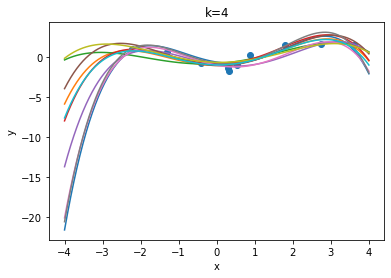

In [87]:
px=np.linspace(-4,4,100)
for i in range(0,10):
    py=samples[i][0]+samples[i][1]*px+samples[i][2]*px*px+samples[i][3]*(px**3)+samples[i][4]*(px**4)
    plt.plot(px,py)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('k=4')

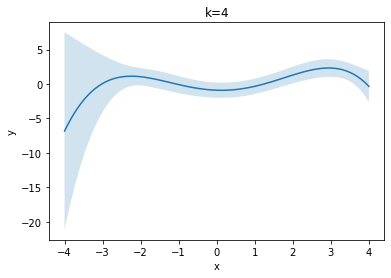

In [88]:
py=postmean[0]+postmean[1]*px+postmean[2]*px*px+postmean[3]*(px**3)+postmean[4]*(px**4)
plt.plot(px,py)
pup=np.zeros(100)
pdown=np.zeros(100)
for i in range(0,100):
    pup[i]=py[i]+2*np.sqrt(.25 + np.matmul(np.matmul(np.array([1,px[i],px[i]**2,px[i]**3,px[i]**4]).transpose(),postvar),np.array([1,px[i],px[i]**2,px[i]**3,px[i]**4])))
    pdown[i]=py[i]-2*np.sqrt(.25 + np.matmul(np.matmul(np.array([1,px[i],px[i]**2,px[i]**3,px[i]**4]).transpose(),postvar),np.array([1,px[i],px[i]**2,px[i]**3,px[i]**4])))
plt.xlabel('x')
plt.ylabel('y')
plt.title('k=4')
plt.fill_between(px, pdown, pup, alpha=0.2)

In [89]:
llh= np.log(multivariate_normal.pdf(y, mean=np.zeros(10), cov=(.25*np.eye(10) + np.matmul(X,X.transpose()))))
llh

-22.386776180349212

In [90]:
llh=0
for i in range(0,10):
    margmean=np.matmul(postmean.transpose(),np.array([1,x[i],x[i]**2,x[i]**3,x[i]**4]))
    margvar=.25
    llh= llh+ multivariate_normal.logpdf([y[i]],mean=margmean,cov=margvar)
llh

-7.225291259028566